In [30]:
%%bash
#strace -f -tt -T -r -y -o logs/view4.st python src/mmarrays.py 100000
strace -f -tt -T -r -y -o logs/view4.st python src/multi_threaded.py
#strace -f -tt -T -r -y -o logs/view4.st lscpu

In [31]:
from strace_miner.views.v4 import IOMinerV4
from strace_miner.views.v3 import IOLineReaderV3

In [32]:
#st_logs = ['logs/python_a65243794be3_24779.st','logs/python_a65243794be3_24781.st']
st_logs = ['logs/view4.st',]
io_calls = ['read','write']
#line_reader = IOLineReaderV3(['data_rank',],collapse=True)
line_reader = IOLineReaderV3(['/dev/data/',],collapse=True)
#line_reader = IOLineReaderV3(collapse=False)
sta = IOMinerV4(st_logs,io_calls,line_reader)
sta.preprocess()
sta.prepare_summaries_and_event_log()
sta.prepare_dfg()

CSV log path: logs/view4.csv

Overall Summary:

Run time: 0.572s
Total duration of Sys calls: 5.718s
System load: 9.993

IO duration: 0.020s
IO load: 0.35%
Total IO events: 4



/home/vscode/.local/lib/python3.12/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [33]:
sta.print_events_summary()

                                                           event  count  max_parallel  io_percent
                                               [read, [<4KB],  ]    198             1       39.22
                                               [read, [<4MB],  ]    120             1       31.94
[write, [<4KB], /workspaces/hdf5-tutorial.../multi_threaded.npy]      8             1        7.32
[write, [<4MB], /workspaces/hdf5-tutorial.../multi_threaded.npy]      4             2       21.52


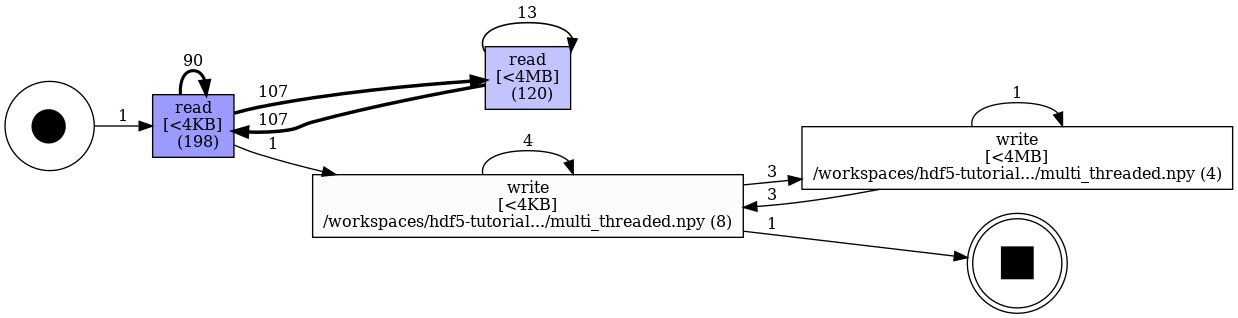

In [34]:
sta.view_dfg()